In [39]:
import numpy as np #for arrays
import pandas as pd #for importing and managing datasets
import pickle #for saving the model
from sklearn.model_selection import train_test_split #for splitting the dataset
from sklearn.svm import SVC #for SVM
from sklearn.metrics import confusion_matrix #for confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
dataset = pd.read_csv('odi_cricket_dataset.csv')
dataset.head()

,Date,Team,Opposition,Ground,10-Runs,10-Wkts,50-Runs,50-Wkts,Result,Above-300
0,13-Jul-18,Pakistan,v Zimbabwe,Bulawayo,36,0,308,7,1,1
1,12-Jul-18,England,v India,Nottingham,71,0,268,10,0,0
2,24-Jun-18,Australia,v England,Manchester,79,2,205,10,0,0
3,21-Jun-18,Australia,v England,Chester-le-Street,61,0,310,8,0,1
4,19-Jun-18,England,v Australia,Nottingham,79,0,481,6,1,1


In [43]:
categorical_data = pd.get_dummies(dataset.iloc[:,1:4])
categorical_data.head()

,Team_Afghanistan,Team_Australia,Team_Bangladesh,Team_Canada,Team_England,Team_Hong Kong,Team_India,Team_Ireland,Team_Kenya,Team_Netherlands,...,Ground_Ranchi,Ground_Sharjah,Ground_Southampton,Ground_St George's,Ground_Sydney,Ground_The Oval,Ground_Townsville,Ground_Visakhapatnam,Ground_Wellington,Ground_Whangarei
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X = np.zeros((588,131),dtype='float64')
X[:,:130]=categorical_data.values
X[:,130:131]=dataset.iloc[:,6:7].values

Y = dataset.iloc[:,8].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [8]:
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf", random_state = 0)
classifier.fit(x_train, y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

accuracy = ((cm[0,0] + cm[1,1]) / 118) * 100

In [10]:
print(accuracy)

72.03389830508475


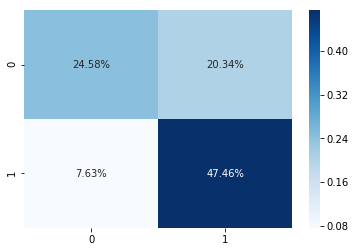

In [34]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [11]:
filename = 'model_2.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [12]:
print(categorical_data.columns)

Index(['Team_Afghanistan', 'Team_Australia', 'Team_Bangladesh', 'Team_Canada',
       'Team_England', 'Team_Hong Kong', 'Team_India', 'Team_Ireland',
       'Team_Kenya', 'Team_Netherlands',
       ...
       'Ground_Ranchi', 'Ground_Sharjah', 'Ground_Southampton',
       'Ground_St George's', 'Ground_Sydney', 'Ground_The Oval',
       'Ground_Townsville', 'Ground_Visakhapatnam', 'Ground_Wellington',
       'Ground_Whangarei'],
      dtype='object', length=130)
